In [4]:
import pandas as pd

In [7]:
from preprocessing import Preprocess
from lstm import build_and_train_model

# LSTM Classifier

In [6]:


df = pd.read_csv('cellula toxic data.csv')

# Initialize preprocessor
preprocessor = Preprocess(df)

# Run full pipeline
data_splits, vocab_info = preprocessor.full_preprocessing_pipeline(
    img_desc_col='image descriptions',
    query_col='query', 
    target_col='Toxic Category',
    max_vocab_size=1000,
    max_seq_length=80
)

# Save tokenizers for future use
preprocessor.save_tokenizers('my_tokenizers')

# Access different splits
train_data = data_splits['train']  # (img_train, query_train, y_train)
val_data = data_splits['val']      # (img_val, query_val, y_val)
test_data = data_splits['test']    # (img_test, query_test, y_test)

# Preprocess new data
img_seq, query_seq = preprocessor.preprocess_new_data(
    "new image description", 
    "new query text"
)


Starting full preprocessing pipeline...
Missing values before cleaning: query                 0
image descriptions    0
Toxic Category        0
dtype: int64
Missing values after cleaning: query                 0
image descriptions    0
Toxic Category        0
dtype: int64
Cleaning text data...
Creating sequences...
Image sequences shape: (3000, 80)
Query sequences shape: (3000, 80)
Encoding labels from column: Toxic Category
Unique classes: ['Safe' 'Violent Crimes' 'Elections' 'Sex-Related Crimes' 'unsafe'
 'Non-Violent Crimes' 'Child Sexual Exploitation' 'Unknown S-Type'
 'Suicide & Self-Harm']
Number of classes: 9
Label shape: (3000, 9)
Splitting data...
Train set: 2100 samples
Validation set: 300 samples
Test set: 600 samples
Preprocessing complete!
Vocabulary info: {'img_vocab_size': 60, 'query_vocab_size': 1000, 'num_classes': 9}
Tokenizers saved with prefix: my_tokenizers


Model built with 641417 parameters
Starting training for 5 epochs...


Validation: 100%|██████████| 10/10 [00:00<00:00, 18.59it/s]


Epoch 1/5
Train Loss: 1.7269, Train Acc: 0.6457
Val Loss: 1.4708, Val Acc: 0.7867
--------------------------------------------------
New best model saved with validation loss: 1.4708


Validation: 100%|██████████| 10/10 [00:00<00:00, 18.59it/s]


Epoch 2/5
Train Loss: 0.8723, Train Acc: 0.8271
Val Loss: 0.5918, Val Acc: 0.8633
--------------------------------------------------
New best model saved with validation loss: 0.5918


Validation: 100%|██████████| 10/10 [00:00<00:00, 18.56it/s]


Epoch 3/5
Train Loss: 0.4676, Train Acc: 0.9081
Val Loss: 0.2973, Val Acc: 0.9700
--------------------------------------------------
New best model saved with validation loss: 0.2973


Validation: 100%|██████████| 10/10 [00:00<00:00, 18.42it/s]


Epoch 4/5
Train Loss: 0.2234, Train Acc: 0.9805
Val Loss: 0.1940, Val Acc: 0.9700
--------------------------------------------------
New best model saved with validation loss: 0.1940


Validation: 100%|██████████| 10/10 [00:00<00:00, 18.62it/s]
d:\Cellula NLP\lstm.py:296: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(s

Epoch 5/5
Train Loss: 0.1266, Train Acc: 0.9867
Val Loss: 0.1621, Val Acc: 0.9600
--------------------------------------------------
New best model saved with validation loss: 0.1621
Training completed!


Testing: 100%|██████████| 19/19 [00:01<00:00, 17.69it/s]


Test Accuracy: 0.9517

Classification Report:
                           precision    recall  f1-score   support

Child Sexual Exploitation       1.00      1.00      1.00        21
                Elections       1.00      1.00      1.00        22
       Non-Violent Crimes       1.00      1.00      1.00        60
                     Safe       0.90      0.95      0.93       199
       Sex-Related Crimes       1.00      1.00      1.00        23
      Suicide & Self-Harm       0.96      1.00      0.98        23
           Unknown S-Type       0.70      0.49      0.58        39
           Violent Crimes       1.00      1.00      1.00       158
                   unsafe       1.00      1.00      1.00        55

                 accuracy                           0.95       600
                macro avg       0.95      0.94      0.94       600
             weighted avg       0.95      0.95      0.95       600



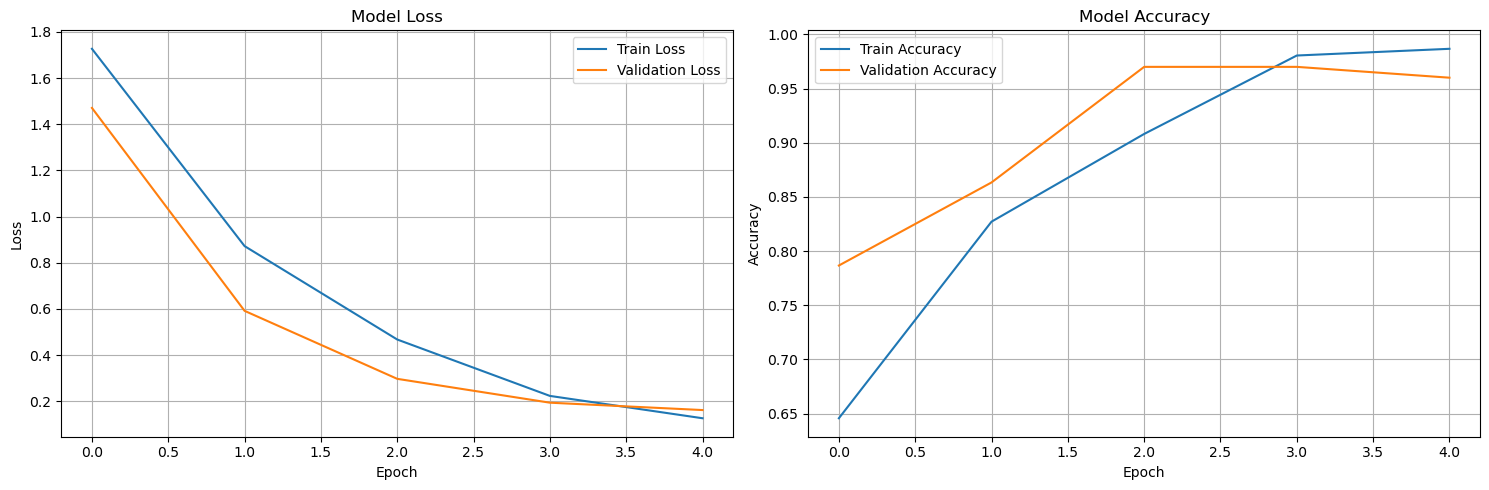

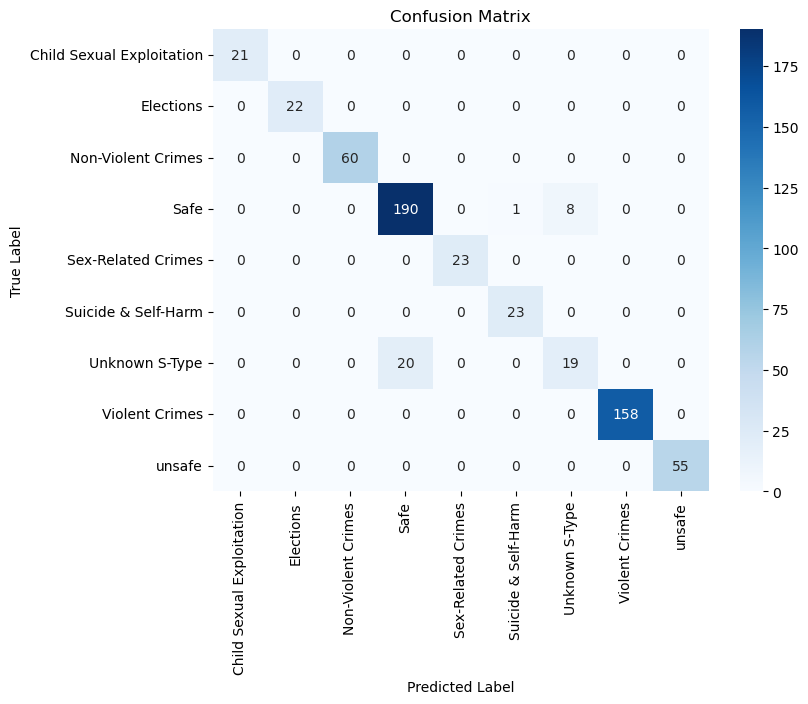

In [8]:

trainer, model, accuracy, report = build_and_train_model(
    data_splits=data_splits,
    vocab_info=vocab_info,
    batch_size=32,
    embedding_dim=128,
    lstm_hidden_size=64,
    num_layers=2,
    dropout_rate=0.3,
    bidirectional=True,
    architecture='basic',  # or 'attention'
    num_epochs=5,
    learning_rate=0.001,
    label_encoder=preprocessor.label_encoder
)


# Peft-Lora DistilBERT

In [13]:
from distilbert import DistilBertLoRATrainer

In [ ]:

df = pd.read_csv("cellula toxic data.csv")
trainer = DistilBertLoRATrainer()
trainer.prepare_data(df, col_a="image descriptions", col_b="query", label_col="Toxic Category")
trainer.train(epochs=5)
acc, report, cm, preds = trainer.test()
trainer.plot_metrics()
trainer.plot_confusion_matrix(cm)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\shrouk qassem\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrouk qassem\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
